In [3]:
# Env
!pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c

In [1]:
# Importing libraries
import pandas as pd                 # ler e tratar dados
import numpy as np                  # operações matemáticas e matriciais
import seaborn as sns               # visualizações/gráficos
import matplotlib.pyplot as plt     # visualizações/gráficos
%matplotlib inline
import glob                         # Arquivos e diretórios

In [ ]:
# CASO FOR RODAR EM UM NOTEBOOK DO GOOGLE COLAB,
# DESCOMENTAR COMANDO ABAIXO PARA A PASTA SRC COMPACTADA

# !unzip src.zip

Archive:  src.zip
   creating: src/datasets/
  inflating: src/datasets/amostra_projeto_2.csv  
  inflating: src/datasets/amostra_projeto_3.csv  
  inflating: src/datasets/amostra_projeto1.csv  
  inflating: src/datasets/amostras_projetos.xlsx  
  inflating: src/datasets/projeto_4.csv  


# Organizando os arquivos

Separando as informações dos arquivos .csv ("DADOS" E "TABELA DE ORCAMENTO")
e criando arquivos com dados separados
Ex: amostra_projeto1.csv é separado em amostra_projeto1_pt0.csv (DADOS) e amostra_projeto1_pt1.csv (TABELA DE ORCAMENTO)

In [ ]:
dataset_path = 'src/datasets/'

In [38]:
for csv_file in glob.glob(dataset_path + 'amostra*.csv'):
    with open(csv_file, 'r') as csv:
        data = ['', '']
        orcamento = ''
        control = 0
        for line in csv.readlines():
            data[control] = data[control] + line

            if line == ',,,,,,,,,,,,,\n':
                control=1

        for idx, table in enumerate(data):
            with open(csv_file.replace('.csv', f'_pt{idx}.csv'), 'w') as new_csv:
                new_csv.write(table)

# Carregando os dados

In [155]:
# Lendo os arquivos como um dataframe pandas

df1_dados = pd.read_csv('src/datasets/amostra_projeto1_pt0.csv', sep=',')
df1_orc = pd.read_csv('src/datasets/amostra_projeto1_pt1.csv', sep=',')

df2_dados = pd.read_csv('src/datasets/amostra_projeto_2_pt0.csv', sep=',')
df2_orc = pd.read_csv('src/datasets/amostra_projeto_2_pt1.csv', sep=',')

df3_dados = pd.read_csv('src/datasets/amostra_projeto_3_pt0.csv', sep=',')
df3_orc = pd.read_csv('src/datasets/amostra_projeto_3_pt1.csv', sep=',')

df4_dados = pd.read_csv('src/datasets/projeto_4.csv', sep=',')

In [156]:
df1_dados

,DADOS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Titulo,Projeto 1 - Wa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tipologia,Térrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Área Terreno,"485,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Área Construída,"246,63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Área Fundação,"237,98",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Área Fachada,"597,88",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Área Parede,"615,86",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Qtde BWCs,"5,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-processando

In [157]:
# Pre-processando tabela dados

def prepocess_dados_df(df, target=False):
    """ Recebe um dataframe pandas como entrada
        Remove colunas e linhas sem dados e aplica transposicao """

    for col in df.columns:
        if col not in ['DADOS', 'Unnamed: 1']:
            df.drop(col, axis=1, inplace=True)

    # removendo a ultima linha (tambem nao contem dados)
    if not target:
        df.drop(df.index[-1], inplace=True)

    # Transpondo o dataframe
    df_transposed = df.set_index('DADOS').transpose().copy()
    df_transposed = df_transposed.rename(index={'Unnamed: 1': 0})

    return df_transposed

df1_dados = prepocess_dados_df(df1_dados)
df2_dados = prepocess_dados_df(df2_dados)
df3_dados = prepocess_dados_df(df3_dados)
df4_dados = prepocess_dados_df(df4_dados, target=True)

In [158]:
df1_dados

DADOS,Titulo,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Projeto 1 - Wa,Térrea,"485,00","246,63","237,98","597,88","615,86","5,00"


In [159]:
df4_dados

DADOS,Titulo,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Projeto 4 - Je3,Sobrado,"250,00","257,00","221,36","430,11","547,27","6,00"


In [160]:
# Pre-processando tabela de orcamento

def prepocess_orc_df(df):

    # Mudando nome das colunas
    col_names = ['item',
                'referencia',
                'tipo',
                'codigo',
                'descricao',
                'unid',
                'qtd',
                'BDI',
                'preco_mat_unit',
                'preco_mat_total',
                'preco_exec_unit',
                'preco_exec_total',
                'preco_unit',
                'preco_total']

    df.columns = col_names

    # removendo cabecalhos antigos
    df.drop([0,1], axis=0, inplace=True)

    # Criando uma nova coluna para armazenar o preco como float
    df['preco_total_float'] = 0

    ## Transformando o preco_total em float
    # iterando sobre todas as amostras
    dict_cols = {j: i for i, j in enumerate(df.columns)}

    for row in df.values:
        preco_total_str = row[dict_cols['preco_total']]
        preco_total_str = preco_total_str.replace('R$', '')
        preco_total_str = preco_total_str.replace('.', '')
        preco_total_str = preco_total_str.replace(' ', '')
        preco_total_str = preco_total_str.replace(',', '.')
        preco_total_float = float(preco_total_str)

        idx_item = row[dict_cols['item']]
        df.loc[df['item']== idx_item, 'preco_total_float'] = preco_total_float

    return df.copy()


df1_orc = prepocess_orc_df(df1_orc)
df2_orc = prepocess_orc_df(df2_orc)
df3_orc = prepocess_orc_df(df3_orc)

In [161]:
df1_orc.head(5)

,item,referencia,tipo,codigo,descricao,unid,qtd,BDI,preco_mat_unit,preco_mat_total,preco_exec_unit,preco_exec_total,preco_unit,preco_total,preco_total_float
2,1.,NaN,NaN,NaN,ETAPAS PRE OBRA,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 8.086,25",NaN,"R$ 8.086,25",8086.25
3,1.1.,NaN,NaN,NaN,SONDAGEM,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 3.000,00",NaN,"R$ 3.000,00",3000.00
4,1.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-SON,SONDAGEM,VB,1,"0,0%",NaN,NaN,"R$ 3.000,00","R$ 3.000,00","R$ 3.000,00","R$ 3.000,00",3000.00
5,1.2.,NaN,NaN,NaN,LEVANTAMENTO TOPOGRAFICO,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 1.200,00",NaN,"R$ 1.200,00",1200.00
6,1.2.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-LVT,LEVANTAMENTO TOPOGRAFICO,VB,1,"0,0%",NaN,NaN,"R$ 1.200,00","R$ 1.200,00","R$ 1.200,00","R$ 1.200,00",1200.00


In [162]:
# checando se existe valores ausentes para o preco total de cada etapa

print(df1_orc['preco_total'].isna().sum())
print(df2_orc['preco_total'].isna().sum())
print(df3_orc['preco_total'].isna().sum())

0
0
0


In [163]:
# Preço total gasto por projeto (adicionado ao dataframe df_dados)

df1_dados['total_price'] = df1_orc['preco_total_float'].sum()
df2_dados['total_price'] = df2_orc['preco_total_float'].sum()
df3_dados['total_price'] = df3_orc['preco_total_float'].sum()

In [164]:
# Criando um unico dataframe

frames = [df1_dados, df2_dados, df3_dados]
df = pd.concat(frames)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [165]:
# Transformando os tipos de dados em df_dados e normalizando

def str_to_float(value):
    value = value.replace('.', '')
    return float(value.replace(',', '.'))


for col in df.columns:
    if col not in ['Titulo', 'Tipologia', 'total_price']:
        df[col] = df[col].apply(str_to_float)
        df4_dados[col] = df4_dados[col].apply(str_to_float)

        # Normalizando as variáveis entre 0 e 1
        max_ = df[col].max()
        min_ = df[col].min()
        df[col] = (df[col] - min_).div(max_ - df[col].min())
        df4_dados[col] = (df4_dados[col] - min_).div(max_ - df4_dados[col].min())

In [166]:
df

DADOS,Titulo,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,total_price
0,Projeto 1 - Wa,Térrea,0.925,0.000000,0.352602,0.33796,0.424658,0.5,3155184.51
1,Projeto 2 - Ca,Sobrado,0.000,0.014633,0.000000,1.00000,1.000000,0.0,2570901.95
2,Projeto 3 - Je2,Sobrado,1.000,1.000000,1.000000,0.00000,0.000000,1.0,4569025.15


In [134]:
df4_dados

DADOS,Titulo,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0


# Análise exploratória

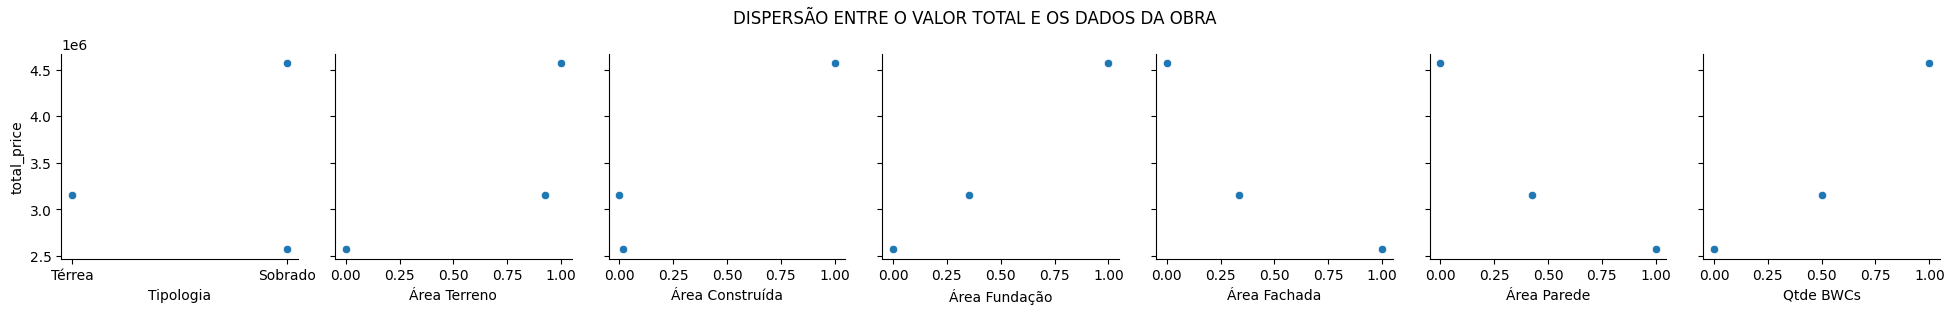

In [52]:
# Plotando o grafico de dispersao

ax = sns.pairplot(df, y_vars=['total_price'], x_vars=['Tipologia', 'Área Terreno', 'Área Construída', 'Área Fundação', 'Área Fachada', 'Área Parede', 'Qtde BWCs'])
ax.fig.suptitle('DISPERSÃO ENTRE O VALOR TOTAL E OS DADOS DA OBRA', y=1.05)
ax.figure.set_size_inches(20,3) #tamanho da fig
ax

<Axes: xlabel='DADOS', ylabel='DADOS'>

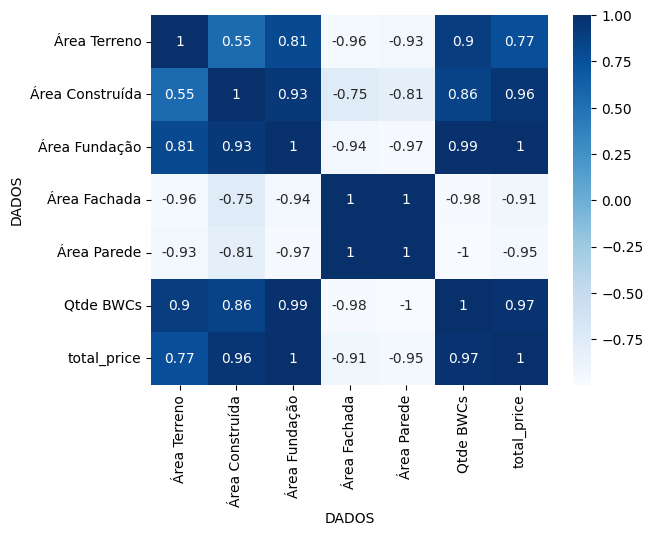

In [135]:
# Matrix de correlacao

corr = df.drop(['Titulo', 'Tipologia'], axis=1).corr()
ax.figure.set_size_inches(10,10) #tamanho da fig
sns.heatmap(corr, cmap="Blues", annot=True)

A partir do gráfico de dispersão entre a variável dependente e as variáveis explicativas, é possível observar relações lineares e exponeciais entre essas variáveis, positivas e negativas .

As amostras das variáveis 'Área construida' e 'Área Terreno' podem apresentar outliers, é algo que precisa ser levado em consideração no problem, principalmente por se tratar de um dataset com poucas amostras

Também devido a pouca quantidade de amostras no dataset, a solução para estimar o preço total da construção será baseada em regressão linear e/ou logaritmica, descartando modelos de ML como decision tree, random forest, SVM, etc.

# Ajustando o modelo

A soluçãoo proposta é baseada em ajustar retas como:

y = a.x + b

E funções exponenciais como:

y = a.Exp(b*x)

em que y é a variável dependente, a e b são os parâmtetros que precisam ser ajustados, e x é a variável explicativa

Levando em consideração o gráfico de dispersão plotado anteriormente, vou utilizar regressão linear para a feature "Área fundação" e regressão de uma função exponencial para as features 'Área Fachada', 'Área Parede' e 'Qtde BWCs'

In [167]:
# Seperando variavel dependente (ou 'target') e variáveis explicativas (ou 'features')

y = np.array(df['total_price'])
X = df[['Área Fundação', 'Área Fachada', 'Área Parede', 'Qtde BWCs']]

x1 = np.array(df[['Área Fundação']])        #linear
x2 = np.array(df[['Área Fachada']])         #exponencial
x3 = np.array(df[['Área Parede']])          #exponencial
x4 = np.array(df[['Qtde BWCs']])            #exponencial

## Regressão Linear

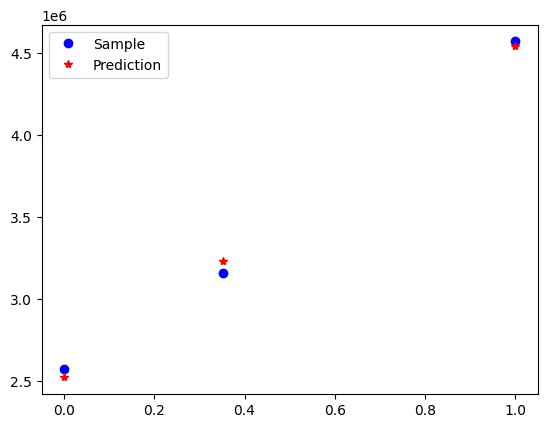

In [168]:
x1 = np.squeeze(x1)

coef = np.polyfit(x1, y, 1)
regression1 = np.poly1d(coef)
# regression1 eh uma funca que recebe x e returna y = ax + b
# a = coef[0] ; b = coef[1]
y_pred1 = regression1(x1)

plt.plot(x1, y, 'bo', label='Sample')
plt.plot(x1, y_pred1, 'r*', label='Prediction')
plt.legend()

plt.show()

R2 Score é uma métrica especialmente útil quando se lida com valores de saída (y) em uma escala grande (já que é uma métrica admensional) que é o caso desse problema. Também mede a proporção da variabilidade dos dados que é explicada pelo modelo de regressão, com valores entre 0 e 1 (0-100%), sendo que 1 significa que o modelo explica toda a variação nos dados.

In [169]:
# Metricas
from sklearn.metrics import r2_score

print('R2 Score = {:.3}'.format(r2_score(y, y_pred1)))

R2 Score = 0.996


## Regressão Exponencial

In [175]:
from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

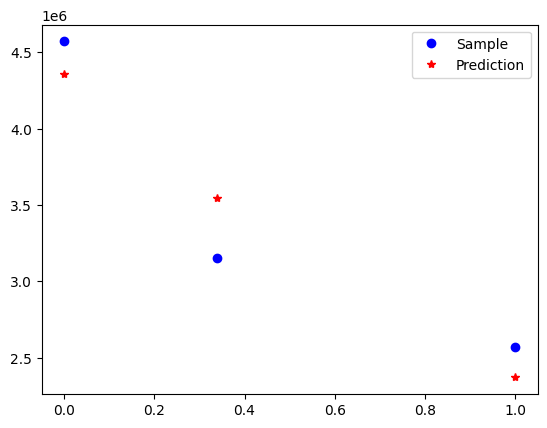


 
 
Modelo: y = 4357274.374 * e^(-0.608 * x)
R² score: 0.8869936175973164


In [176]:
# Para x2 - 'Área Fachada'

# Ajustando a equacao
x2 = np.squeeze(x2)
params, covariance = curve_fit(exponential_func, x2, y)
a, b = params

# Predictions
y_pred2 = exponential_func(x2, a, b)

# Avaliando
r2 = r2_score(y, y_pred2)

plt.plot(x2, y, 'bo', label='Sample')
plt.plot(x2, y_pred2, 'r*', label='Prediction')
plt.legend()

plt.show()

print(f'\n \n \nModelo: y = {a:.3f} * e^({b:.3f} * x)')
print(f'R² score: {r2}')

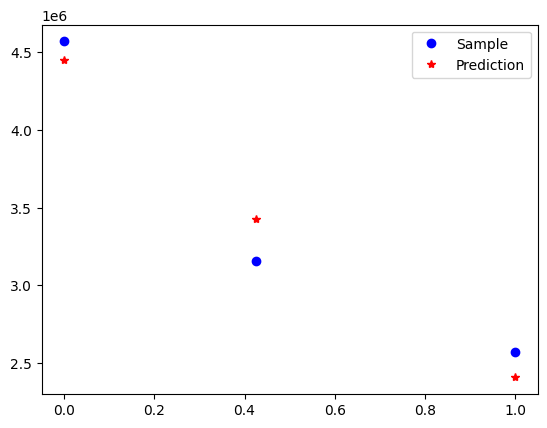


 
 
Modelo: y = 4448563.603 * e^(-0.614 * x)
R² score: 0.9453366711431576


In [82]:
# Para x3 - 'Área Parede'

# Ajustando a equacao
x3 = np.squeeze(x3)
params, covariance = curve_fit(exponential_func, x3, y)
a, b = params

# Predictions
y_pred3 = exponential_func(x3, a, b)

# Avaliando
r2 = r2_score(y, y_pred3)

plt.plot(x3, y, 'bo', label='Sample')
plt.plot(x3, y_pred3, 'r*', label='Prediction')
plt.legend()

plt.show()

print(f'\n \n \nModelo: y = {a:.3f} * e^({b:.3f} * x)')
print(f'R² score: {r2}')

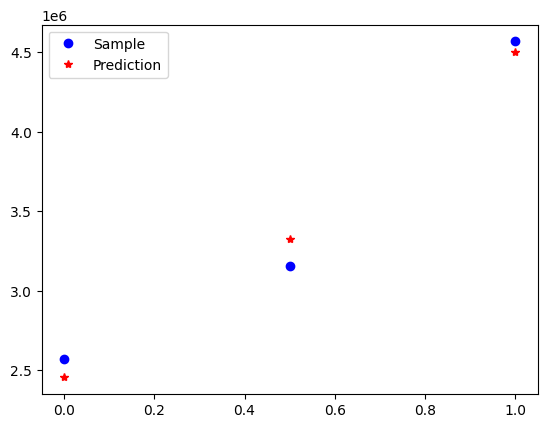


 
 
Modelo: y = 2455146.179 * e^(0.607 * x)
R² score: 0.9779335680110522


In [84]:
# Para x4 - 'Qtde BWCs'

# Ajustando a equacao
x4 = np.squeeze(x4)
params, covariance = curve_fit(exponential_func, x4, y)
a, b = params

# Predictions
y_pred4 = exponential_func(x4, a, b)

# Avaliando
r2 = r2_score(y, y_pred4)

plt.plot(x4, y, 'bo', label='Sample')
plt.plot(x4, y_pred4, 'r*', label='Prediction')
plt.legend()

plt.show()

print(f'\n \n \nModelo: y = {a:.3f} * e^({b:.3f} * x)')
print(f'R² score: {r2}')

In [106]:
# Utilizando a predicao como sendo a media das predicoes

y_pred_mean = (y_pred1 + y_pred2 + y_pred3 + y_pred4)/4

# df['mean_preds'] = y_pred_mean

# ax = sns.pairplot(df, y_vars=['total_price', 'mean_preds'], x_vars=['Área Fundação', 'Área Fachada', 'Área Parede', 'Qtde BWCs'])
# ax.figure.set_size_inches(20,3)
# ax

# Avaliando
r2 = r2_score(y, y_pred_mean)
print(f'\n \nR² score: {r2} \n \n')


 
R² score: 0.9617187395154666 
 



# Predição!

Analisando os dados e as métricas obtidas para todos os modelos, o que melhor se ajusta aos dados apresentados é o modelo de regressão linear utilizando a feature 'Área Fundação' como variável explicativa. Com o valor do r2 score de 0.996 e com a maior medida de correlação entre o Preço total da construção, ele é o que poderá gerar o menor erro na predição. Mas (hipótese) talvez usar a média das predições tenha bons resultados em um contexto mais genérico, com mais dados, seria necessário fazer alguns testes (com mais dados) para avaliar esse resultado

### predição utilizando o modelo de regressão linear para a feature "Área Fundação"

In [102]:
X = df4_dados[['Área Fundação']]
X = np.array(X)
X = np.squeeze(X)

y_pred_projeto4 = regression1(X)

print(f'Valor estimado da obra do projeto 4: R$ {y_pred_projeto4:.2f}')

Valor estimado da obra do projeto 4: R$ 3290650.73


# Algumas considerações

A pequena quantidade de amostras é um fator limitante para diversas conclusões, como a utilização das melhores variáveis explicativas, definição de outliers e até o próprio ajuste da curva.

Por exemplo:

Devido a quantidade pequena de amostrar, eu não consigo obter um valor de deslocamento do eixo y ou "bias" (que chamei de c), que ficaria como:

y = a.Exp(b*x) + c

Que poderia fazer com que o ajuste da curva exponecial fosse ótimo, já que a variável dependente tem um escala grande na casa dos milhões

Para provar isso, usarei um valor de escala próxima as saídas para o parâmetro c usando a variável x2 que anteriormente obteve um R2 de 88%.

In [180]:
# Com uma funcao exponencial com bias

from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func_bias(x, a, b):
    return a * np.exp(b * x) + 1000000 # exemplo de c=1000000

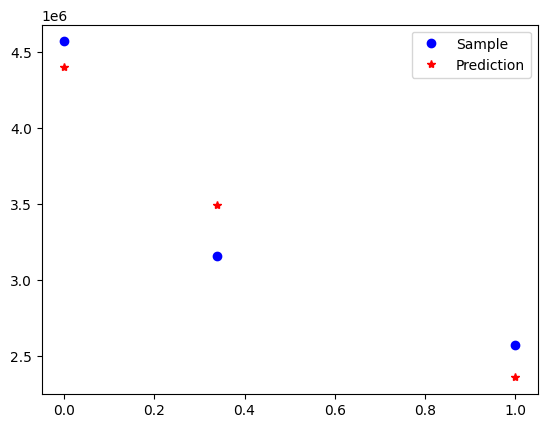


 
 
Modelo: y = 3403583.714 * e^(-0.918 * x) + 1000000
R² score: 0.9108460307859523


In [181]:
# Para x2 - 'Área Fachada' com a funcao exponecial com bias

# Ajustando a equacao
x_teste = np.squeeze(x2)
params, covariance = curve_fit(exponential_func_bias, x_teste, y)
a, b = params

# Predictions
y_pred_teste = exponential_func_bias(x_teste, a, b)

# Avaliando
r2 = r2_score(y, y_pred_teste)

plt.plot(x_teste, y, 'bo', label='Sample')
plt.plot(x_teste, y_pred_teste, 'r*', label='Prediction')
plt.legend()

plt.show()

print(f'\n \n \nModelo: y = {a:.3f} * e^({b:.3f} * x) + 1000000')
print(f'R² score: {r2}')

Obtivemos uma melhora significativa no na precisão da curva ajustada, com um R² score de 0.91.

Mas não posso chutar um valor para esse parâmetro, por que ele não levaria em consideração todos os cenários do problema em questão...

A fim de obter um modelo generalista e preciso, algumas outras abordagens podem ser utilizadas, como:


*   Utilizar datasets públicos
*   Utilizar novas features relevantes (estado, cidade, bairro, próximidade estação de metrô/trem, entre muitas outras)

